In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [58]:
data = pd.read_csv("earthquakes.csv")

In [59]:
data

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


In [62]:
for i in range(len(data["Time"])):
    data['Date'][i] = data['Date'][i][-4:]
    if len(data["Time"][i]) != 8:
        
        data["Time"][i] = data["Time"][i][11:19]

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [76]:
export = data[['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Magnitude']]

export.to_csv('earthquakes_clean.csv', index = False)

In [72]:
len([d for d in data['Depth'] if not math.isnan(d)])

23412

In [7]:
data.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [8]:
len([d for d in data['Horizontal Distance'] if not math.isnan(d)])

1604

In [9]:
data.loc[data['Type'] == "Rock Burst"]

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
19898,2010-02-05 06:59:05+00:00,06:59:05,-47.911,99.593,Rock Burst,1.0,NaN,203.0,6.2,MWC,...,NaN,43.9,NaN,NaN,1.14,USP000H6Z1,US,US,US,Reviewed


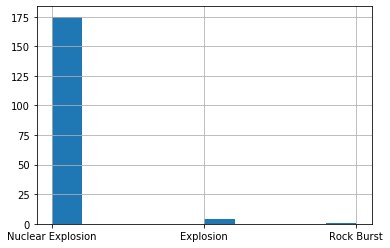

In [11]:
outliers = data.loc[data['Type'] != "Earthquake"]
fig = plt.figure()
ax = fig.gca()
ax.grid()
ax.hist([outliers['Type'] ])
plt.savefig("Earthquakes/classes.png")

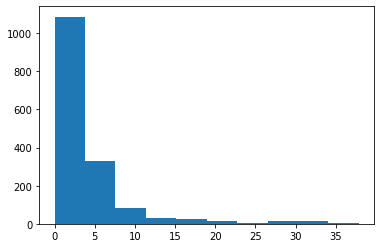

In [13]:
plt.hist([d for d in data['Horizontal Distance'] if not math.isnan(d)])
plt.savefig("Earthquakes/horizontal_dist.png")

(array([1.4107e+04, 5.6570e+03, 1.8100e+03, 1.1000e+03, 3.9300e+02,
        2.1400e+02, 1.0400e+02, 1.9000e+01, 5.0000e+00, 3.0000e+00]),
 array([5.5 , 5.86, 6.22, 6.58, 6.94, 7.3 , 7.66, 8.02, 8.38, 8.74, 9.1 ]),
 <a list of 10 Patch objects>)

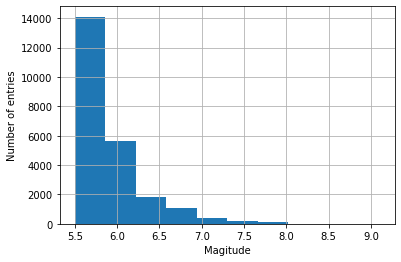

In [22]:
fig = plt.figure()
ax = fig.gca()
ax.grid()
ax.set_xlabel("Magitude")
ax.set_ylabel("Number of entries")
ax.hist([data['Magnitude']])

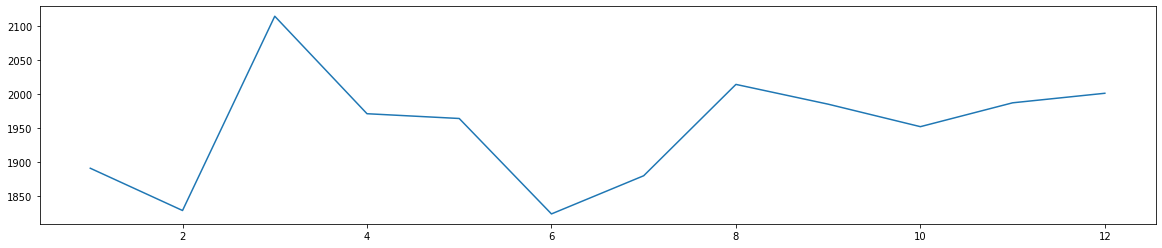

In [11]:
fig = plt.figure(figsize = (20,4))
ax = fig.gca()
ax.plot(data.groupby(data['Date'].dt.month).size())

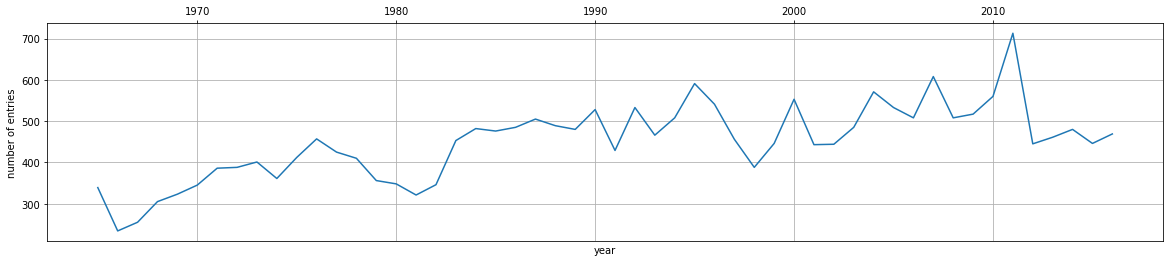

In [27]:
fig = plt.figure(figsize = (20,4))
ax = fig.gca()
ax.grid()
ax.set_xlabel("year")
ax.set_ylabel("number of entries")
ax.xaxis.tick_top()
ax.plot(data.groupby(data['Date'].dt.year).size())

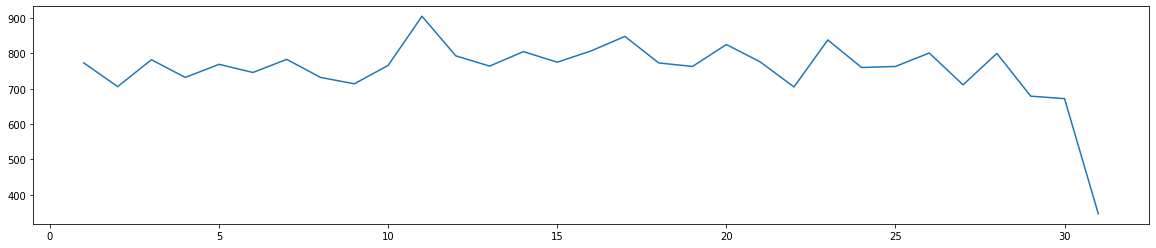

In [13]:
fig = plt.figure(figsize = (20,4))
ax = fig.gca()
ax.plot(data.groupby(data['Date'].dt.day).size())